<a href="https://colab.research.google.com/github/Jensilin338/UID-hth/blob/main/UIDAI_Enrolment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")


In [ ]:
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            500000 non-null  datetime64[ns]
 1   state           500000 non-null  object        
 2   district        500000 non-null  object        
 3   pincode         500000 non-null  int64         
 4   age_0_5         500000 non-null  int64         
 5   age_5_17        500000 non-null  int64         
 6   age_18_greater  500000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 26.7+ MB


In [ ]:
age_summary = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_summary


,0
age_0_5,2020406
age_5_17,1157841
age_18_greater,122779


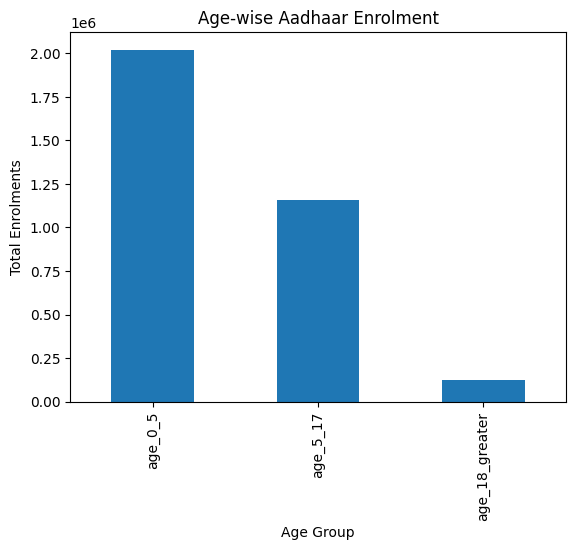

In [ ]:
age_summary.plot(kind='bar', title='Age-wise Aadhaar Enrolment')
plt.xlabel('Age Group')
plt.ylabel('Total Enrolments')
plt.show()


In [ ]:
state_summary = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_summary['total'] = state_summary.sum(axis=1)
state_summary.head()


,age_0_5,age_5_17,age_18_greater,total
state,,,,
100000,0,1,12,13
Andaman & Nicobar Islands,53,4,0,57
Andaman and Nicobar Islands,172,19,0,191
Andhra Pradesh,51803,7746,835,60384
Arunachal Pradesh,1253,1573,50,2876


In [ ]:
top_states = state_summary.sort_values(by='total', ascending=False).head(10)
top_states


,age_0_5,age_5_17,age_18_greater,total
state,,,,
Uttar Pradesh,327183,330177,13066,670426
Bihar,160819,220183,9899,390901
Madhya Pradesh,189919,81008,6154,277081
West Bengal,159270,58386,4604,222260
Maharashtra,156612,60117,5301,222030
Rajasthan,137145,66169,2385,205699
Gujarat,123380,57421,12512,193313
Assam,100088,49915,17160,167163
Karnataka,91744,21967,8051,121762


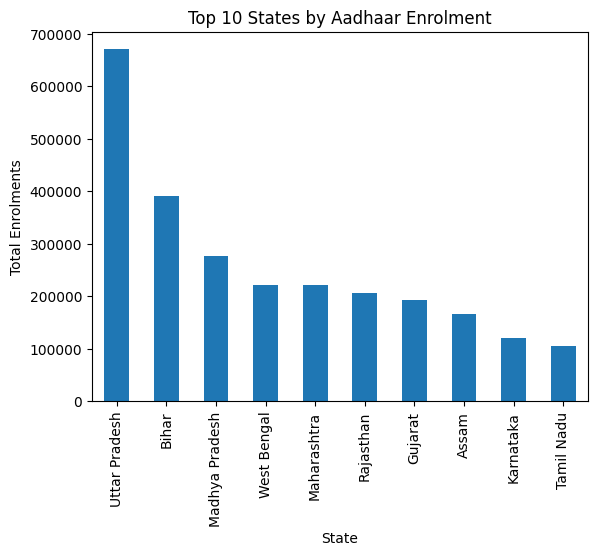

In [ ]:
top_states['total'].plot(kind='bar', title='Top 10 States by Aadhaar Enrolment')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.show()


In [ ]:
date_summary = df.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
date_summary.head()


,age_0_5,age_5_17,age_18_greater
date,,,
2025-03-02,11,61,37
2025-03-09,1037,1777,590
2025-03-15,710,1561,831
2025-03-20,2291,2533,1394
2025-03-23,138,259,179


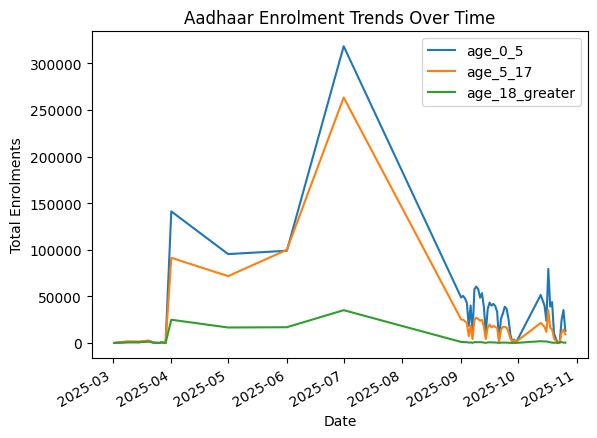

In [ ]:
date_summary.plot(title='Aadhaar Enrolment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.show()
